<a href="https://colab.research.google.com/github/theheking/intro-to-python/blob/gh-pages/4_CombiningDataFrameswPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Combining DataFrames with Pandas

- need to combine multiple files --> single dataframe
- pandas package provides various methods for combining DataFrames
  - including merge and concat

To work through the examples below, we first need to load the species and surveys files into pandas DataFrames. Before we start, we will make sure that libraries are currectly installed.

In [ ]:
!pip install pandas matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import urllib.request
# You can also get this URL value by right-clicking the `surveys.csv` link above and selecting "Copy Link Address"
url = 'https://monashdatafluency.github.io/python-workshop-base/modules/data/surveys.csv'
# url = 'https://goo.gl/9ZxqBg'  # or a shortened version to save typing
urllib.request.urlretrieve(url, 'surveys.csv')

('surveys.csv', <http.client.HTTPMessage at 0x7fca58d93e10>)

In [ ]:
import pandas as pd
surveys_df = pd.read_csv("surveys.csv",
                         keep_default_na=False, na_values=[""])
surveys_df

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


# Concatenating DataFrames

Need to think about the dataframe stuctures before hand

In [ ]:

# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)
# Grab the last 10 rows
survey_sub_last10 = surveys_df.tail(10)
# Reset the index values to the second dataframe appends properly
survey_sub_last10=survey_sub_last10.reset_index(drop=True)
# drop=True option avoids adding new index column with old index values

-  use the concat function in pandas to append either columns or rows from one DataFrame to another. 

- specify the axis
- axis=0 --> stack the second DataFrame under the first one.
- axis=1 will stack the columns in the second DataFrame to the RIGHT of the first DataFrame.


In [ ]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)

# Place the DataFrames side by side
horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)


## Row Index Values and Concat

- check out vertical_stack dataframe
- notice anything unusual?

- To reset the index need to use reset_index function?

# Writing Out Data to CSV
- we can use the to_csv command to do export a DataFrame
- Export to your current working directory


In [ ]:
# Write DataFrame to CSV
vertical_stack.to_csv('output/out.csv', index=False)


In [ ]:
# For kicks read our output back into Python and make sure all looks good
new_output = pd.read_csv('output/out.csv', keep_default_na=False, na_values=[""])


Challenge - Combine Data
In the data folder:
- Input two survey data files - survey2001.csv & survey2002.csv
- New file locations of 'https://ucsbcarpentry.github.io/truncated-python-ecology-lesson/data/yearly_files/surveys2001.csv'
- Combine into one new dataframe
- Create a plot of average plot weight by year of group by sex
- Export your results as a csv and make sure it reads back into python properly

In [ ]:
import urllib.request
# You can also get this URL value by right-clicking the `surveys.csv` link above and selecting "Copy Link Address"
url = 'https://ucsbcarpentry.github.io/truncated-python-ecology-lesson/data/yearly_files/surveys2001.csv'
# url = 'https://goo.gl/9ZxqBg'  # or a shortened version to save typing
urllib.request.urlretrieve(url, 'surveys2001.csv')
# You can also get this URL value by right-clicking the `surveys.csv` link above and selecting "Copy Link Address"
url = 'https://ucsbcarpentry.github.io/truncated-python-ecology-lesson/data/yearly_files/surveys2001.csv'
# url = 'https://goo.gl/9ZxqBg'  # or a shortened version to save typing
urllib.request.urlretrieve(url, 'surveys2002.csv')



('surveys2002.csv', <http.client.HTTPMessage at 0x7fe260bcfbd0>)

In [ ]:
survey_2002=pd.read_csv('surveys2002.csv')
survey_2001=pd.read_csv('surveys2001.csv')

In [ ]:
print(survey_2002.columns)
print(survey_2001.columns)

concat_df=pd.concat([survey_2001, survey_2002])

Index(['Unnamed: 0', 'record_id', 'month', 'day', 'year', 'site_id',
       'species_id', 'sex', 'hindfoot_length', 'weight'],
      dtype='object')
Index(['Unnamed: 0', 'record_id', 'month', 'day', 'year', 'site_id',
       'species_id', 'sex', 'hindfoot_length', 'weight'],
      dtype='object')


In [ ]:
concat_df.head(n=2)

,Unnamed: 0,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,31710,31711,1,21,2001,1,PB,F,26.0,25.0
1,31711,31712,1,21,2001,1,DM,M,37.0,43.0


In [ ]:
import matplotlib.pyplot as plt

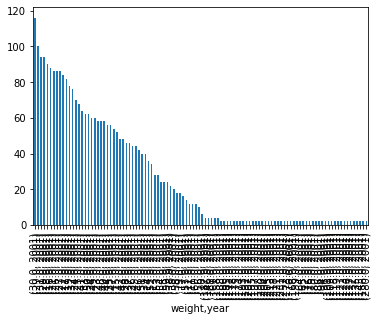

In [ ]:
#create a plot of average plot weight by year of group by sex

#concat_df weight 
#concat_df sex 
#concat_df group
concat_df[['weight','year']].value_counts().plot(x="weight", y="year", kind="bar" )

# Joining DataFrames
Another method is to combine DataFrames is to use columns in each dataset that contain a common id
- "joining"
- "join keys" columns containing common values are join keys
- good application when using lookup tables

Benefits of joining
- consistency of data
- Make changes to infomation at once
- optimises size of our data

## Joining Two DataFrames

- Use head to find the first 10 lines of data.


In [ ]:
# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)

### Download speciesSubset.csv file from web
import urllib.request

url = 'https://bit.ly/2DfqN6C'


urllib.request.urlretrieve(url, 'speciesSubset.csv')

# Import a small subset of the species data designed for this part of the lesson.
# It is stored in the data folder.
species_sub = pd.read_csv('speciesSubset.csv', keep_default_na=False, na_values=[""])

In [ ]:
#species sub is the lookup table containing all the names you want to join with survey_sub --> produces a new ataframe 
#containing all columns from both species_df and survey_df

print(species_sub.columns)
print(survey_sub.columns)


Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')
Index(['record_id', 'month', 'day', 'year', 'site_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


our join key is the column containing the two-letter species identifier called species_id

Now to join.... 
but there are different types

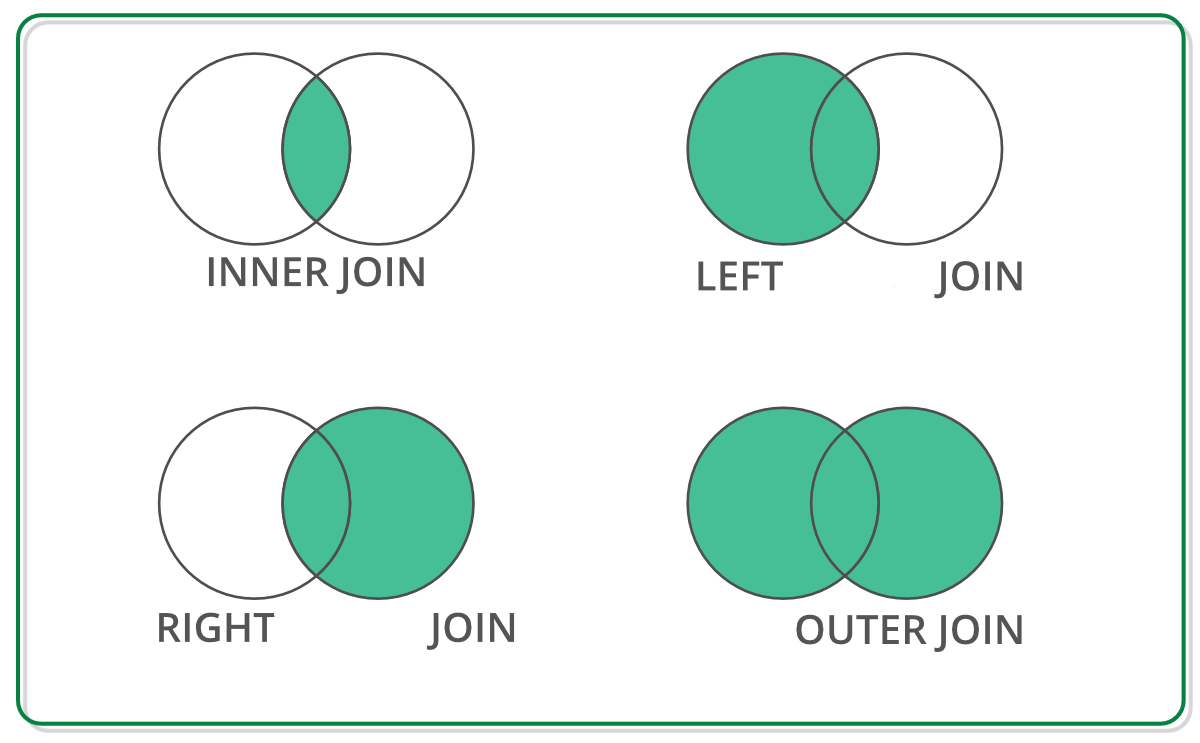

The arguement of the function merge
- left
- right
- left_on
- right_on
- how

# Inner joins 
- the value has to be present in both tables 


Are the number of rows different in between the different dataframes?


In [ ]:
merged_inner = pd.merge(left=survey_sub,right=species_sub, left_on='species_id', right_on='species_id')
# In this case `species_id` is the only column name in  both dataframes, so if we skippd `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
print(merged_inner.shape)
merged_inner


(8, 12)


,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
6,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
7,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent


In [ ]:
#what about with left join?
merged_left = pd.merge(left=survey_sub,right=species_sub, how='left', left_on='species_id', right_on='species_id')

merged_left

#what about the number of rows in the resultant dataframe?
#is it different from inner join?


 When we inspect merged_left, we find there are rows where the information that should have come from species_sub (i.e., species_id, genus, and taxa) is missing (they contain NaN values):

In [ ]:
merged_left[ pd.isnull(merged_left.genus) ]


These rows are the ones where the value of species_id from survey_sub (in this case, PF) does not occur in species_sub.

The pandas merge function supports two other join types:

- Right (outer) join:
  - Invoked by passing how='right' as an argument. 
  - Similar to a left join, except all rows from the right DataFrame are kept, while rows from the left DataFrame without matching join key(s) values are discarded.

- Full (outer) join: 
  - Invoked by passing how='outer' as an argument. 
  - This join type returns the all pairwise combinations of rows from both DataFrames; i.e., the result DataFrame will NaN where data is missing in one of the dataframes. 
  - This join type is very rarely used.


## Extra challenge
Create a new DataFrame by joining the contents of the surveys.csv and speciesSubset.csv tables. Then calculate and plot the distribution of:

1. taxa by plot
2. taxa by sex by plot
